### Today Objectives:

* ClassficationMetrics
* Classficationreports
* ConfustionMatrics
* Label encoder
* DecisionTree
* RandomForest


### Regression Metrics:
* score metrics
    * score
    * r2-score
* Error metrics
    * MSE
    * MAE
    * RMSE
    
### Classficatin Metrics:
* score metrics
    * score
    * accuracy-score
* Erro metrics:
    * confusion matrix
        * precision score
        * recall score
        * f1-score

### Data pre-processing for label encode

* Label encoder
* One-Hot encoder
* get dummies

In [6]:
import pandas as pd
import numpy as np

d=pd.DataFrame({'sname':['siva','gopi','madevi','sai','lohitha','lakshmi'],
               'gender':['Male','Male','Female','Male','Female','Female'],
               'ms':['married','unmarried','unmarried','unspecified','unspecified','married'],
               'isbool':['True','True','False','False','True','True']})
d

,sname,gender,ms,isbool
0,siva,Male,married,True
1,gopi,Male,unmarried,True
2,madevi,Female,unmarried,False
3,sai,Male,unspecified,False
4,lohitha,Female,unspecified,True
5,lakshmi,Female,married,True


In [7]:
# label encode
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
d['gender']=le.fit_transform(d['gender'])
d

,sname,gender,ms,isbool
0,siva,1,married,True
1,gopi,1,unmarried,True
2,madevi,0,unmarried,False
3,sai,1,unspecified,False
4,lohitha,0,unspecified,True
5,lakshmi,0,married,True


In [8]:
le.classes_

array(['Female', 'Male'], dtype=object)

In [9]:
# get dummies
d1=pd.get_dummies(d['isbool'])
d1

,False,True
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
5,0,1


In [10]:
df=pd.concat([d,d1],axis=1)
df

,sname,gender,ms,isbool,False,True
0,siva,1,married,True,0,1
1,gopi,1,unmarried,True,0,1
2,madevi,0,unmarried,False,1,0
3,sai,1,unspecified,False,1,0
4,lohitha,0,unspecified,True,0,1
5,lakshmi,0,married,True,0,1


### confussion matrix

<img src="confusion.png" height='50px' weight='50px'>

### Decision Tree:

* Decision tree is also known as CRT
* It is used for both classfication and regression
* It create a tree struces for dataset using entropy and gini

In [11]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
iris=load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [12]:
# create a dataframe
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
# add a new target column
df['Target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
# select input and output values
x=df.drop('Target',axis=1)
y=df['Target']

In [16]:
# split data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [17]:
# select the model
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [19]:
# find the accuracy score
from sklearn.metrics import accuracy_score
y_pred=model.predict(x_test)
print("accuracy score is:",accuracy_score(y_test,y_pred))

accuracy score is: 1.0


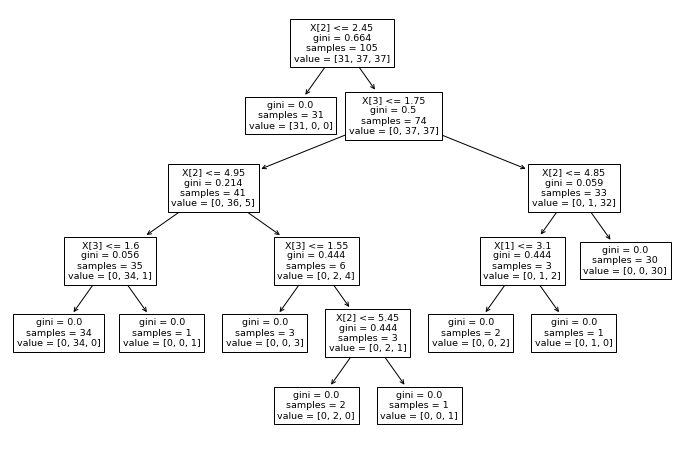

In [21]:
# Decision tree visulization
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(model)
plt.show()

### Randomforest:
* RandomForest classifies the data using no.of decisiontree classfication
* RandomForest return the output which deicison is provide more accuracy

In [22]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
iris=load_iris()
# create a dataframe
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df['Target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
# select input and output values
x=df.drop('Target',axis=1)
y=df['Target']

In [24]:
# split data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [25]:
# select the model
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=50)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [26]:
# prediction
y_pred=model.predict(x_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [27]:
# find the accuracy score
from sklearn.metrics import accuracy_score
print("score is:",accuracy_score(y_test,y_pred))

score is: 1.0


In [29]:
# classificatio reports
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [30]:
# confusio matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
